In [0]:

from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [0]:


# MNIST Data - 10 Classes (0-9)
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu')) 
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)           

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

((XTrain,YTrain),(XTest,YTest)) = mnist.load_data()

In [0]:
print(XTrain.shape)

def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

XTrain,YTrain = preprocess_data(XTrain,YTrain)
print(XTrain.shape,YTrain.shape)


XTest,YTest = preprocess_data(XTest,YTest)

(60000, 28, 28)
(60000, 28, 28, 1) (60000, 10)


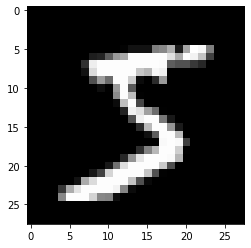

In [0]:
import matplotlib.pyplot as plt
plt.imshow(XTrain[0].reshape((28,28)),cmap='gray')
plt.show()


In [0]:
YTrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


hist = model.fit(XTrain,YTrain,epochs=20,validation_split=0.1,batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 117us/step - loss: 0.2869 - acc: 0.9100 - val_loss: 0.0564 - val_acc: 0.9833
Epoch 2/20
54000/54000 [==============================] - 6s 103us/step - loss: 0.0618 - acc: 0.9812 - val_loss: 0.0454 - val_acc: 0.9867
Epoch 3/20
54000/54000 [==============================] - 6s 102us/step - loss: 0.0451 - acc: 0.9860 - val_loss: 0.0454 - val_acc: 0.9865
Epoch 4/20
54000/54000 [==============================] - 6s 104us/step - loss: 0.0342 - acc: 0.9893 - val_loss: 0.0374 - val_acc: 0.9893
Epoch 5/20
54000/54000 [==============================] - 5s 102us/step - loss: 0.0284 - acc: 0.9912 - val_loss: 0.0359 - val_acc: 0.9893
Epoch 6/20
54000/54000 [==============================] - 5s 101us/step - loss: 0.0225 - acc: 0.9930 - val_loss: 0.0345 - val_acc: 0.9912
Epoch 7/20
54000/54000 [==============================] - 5s 101us/step - loss: 0.0202 - acc: 0.9932 - val_loss: 0.0373 - v

In [0]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 1s 92us/step


[0.039451049690046106, 0.9902]